# Final project: Image Classification with PyTorch on SVHN dataset for Deep Learning course at Algebra UC by student Kateryna Lelas



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import torchvision
from torchvision import datasets, transforms

from scipy.io import loadmat

# Dataset information




*   The Street View House Numbers dataset is the real world dataset obtained from house numbers in Google Street View images. 
*   10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
*   73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data
*   Can be found here: http://ufldl.stanford.edu/housenumbers/ in two formats: full numbers and cropped digits


>  For this project the format of cropped digits was used:
32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).






# Load and View train dataset

### Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
!ls

/content/drive/My Drive/Colab Notebooks
 caesar_salad
 caprese_salad
'Copy of 03_collaborative_filtering_colab.ipynb'
'Copy of Copy of Copy of Untitled2.ipynb'
'Copy of Copy of Untitled2 (1).ipynb'
'Copy of Copy of Untitled2.ipynb'
'Copy of  Fashion-MNIST (Homework)_Kateryna_Lelas (1).ipynb'
'Copy of  Fashion-MNIST (Homework)_Kateryna_Lelas.ipynb'
'Copy of Fashion-MNIST (Homework Solution) (1).ipynb'
'Copy of Fashion-MNIST (Homework Solution) (2).ipynb'
'Copy of Fashion-MNIST (Homework Solution).ipynb'
'Copy of GradientDescentExercise.ipynb'
'Copy of Inference and Validation (Exercises).ipynb'
'Copy of Inference and Validation (Solution) (1).ipynb'
'Copy of Inference and Validation (Solution).ipynb'
'Copy of Loading Image Data (Exercises).ipynb'
'Copy of Part 1 - Tensors in PyTorch (Exercises).ipynb'
'Copy of Part 2 - Neural Networks in PyTorch (Exercises) (1).ipynb'
'Copy of Part 2 - Neural Networks in PyTorch (Exercises).ipynb'
'Copy of Saving and Loading Models.ipynb'
'Copy of tenso

Reference: https://pytorch.org/docs/stable/_modules/torchvision/datasets/svhn.html#SVHN

### Open dataset with loadmat:


In [0]:
x = loadmat('train_32x32.mat')
image_train, label_train = x['X'], x['y']
label_train = label_train.astype(np.int64).squeeze()
image_train = np.transpose(image_train, (3, 0, 1, 2)) #(width, height, channels, size) -> (size, width, height, channels)
np.place(label_train, label_train == 10, 0) # the svhn dataset assigns the class label "10" to the digit 0 
print(image_train.shape,label_train.shape)

(73257, 32, 32, 3) (73257,)


In [0]:
def show(image):
  ig, axes = plt.subplots()
  plt.imshow(image)

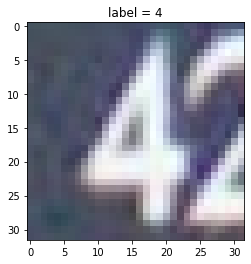

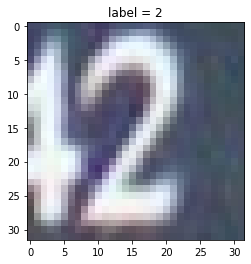

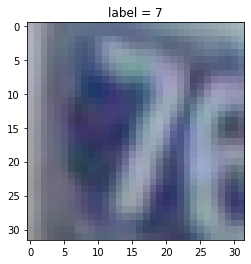

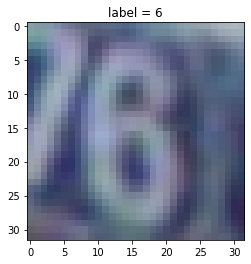

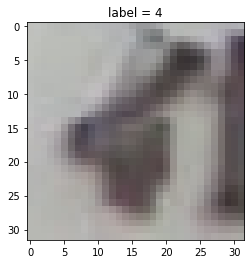

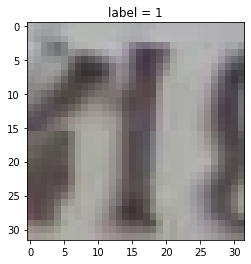

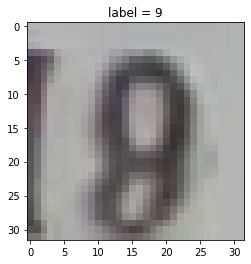

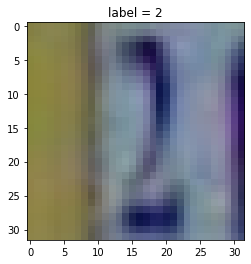

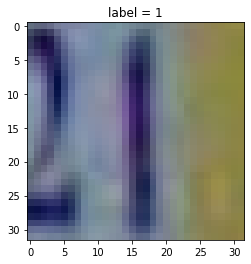

In [0]:
def show(image):
  ig, axes = plt.subplots()
  plt.imshow(image)

for i in range(360,369):
  show(image_train[i])
  plt.title('label = {}'.format(label_train[i]))

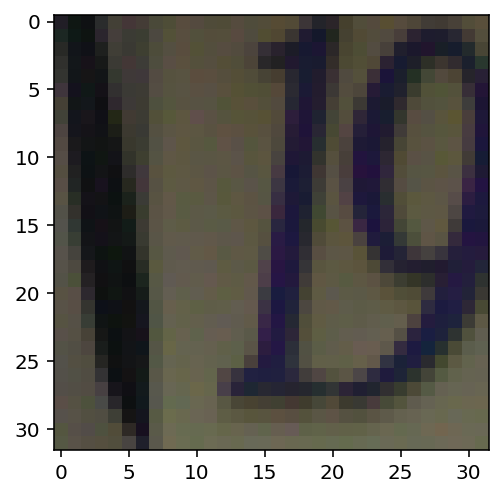

In [0]:
show(image_train[0])

Transform:

In [0]:
transform = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

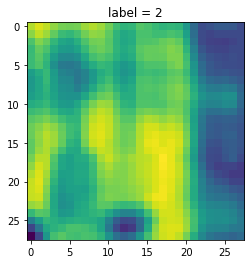

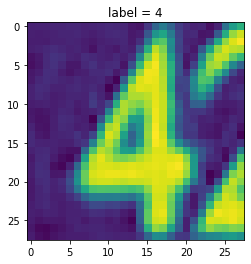

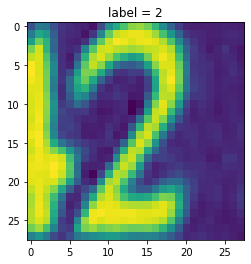

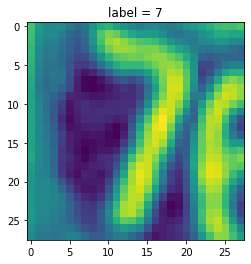

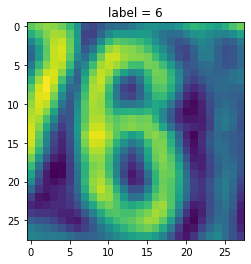

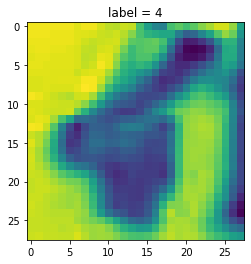

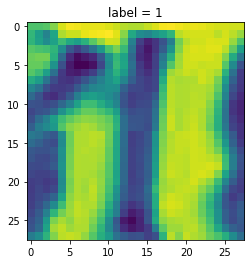

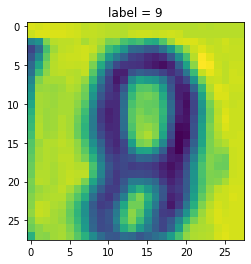

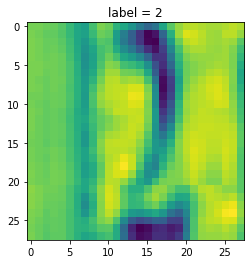

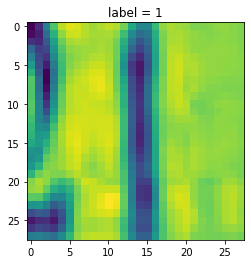

In [0]:
for i in range(359,369):
  show(transform_one_channel(image_train[i]).numpy().squeeze())
  plt.title('label = {}'.format(label_train[i]))

# Load and View test dataset


In [0]:
x_test = loadmat('test_32x32.mat')
image_test, label_test = x_test['X'], x_test['y']
label_test = label_test.astype(np.int64).squeeze()
image_test = np.transpose(image_test, (3, 0, 1, 2)) #(width, height, channels, size) -> (size, width, height, channels)
np.place(label_test, label_test == 10, 0) # the svhn dataset assigns the class label "10" to the digit 0 this makes it inconsistent with several loss functions which expect the class labels to be in the range [0, C-1]
print(image_test.shape,label_test.shape)

(26032, 32, 32, 3) (26032,)


In [0]:
print('train data =', round(73257/99289,4 )*100, '%, test data = ', round(1-73257/99289,4) *100, '%' )

train data = 73.78 %, test data =  26.22 %


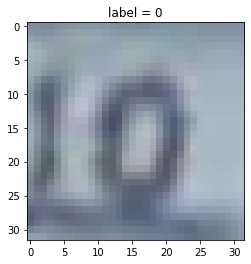

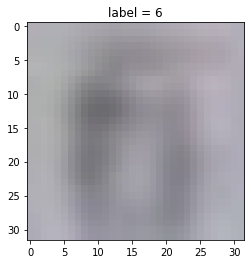

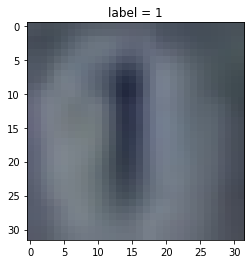

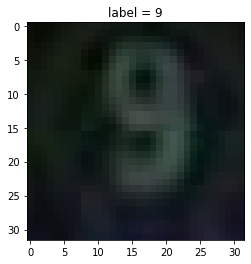

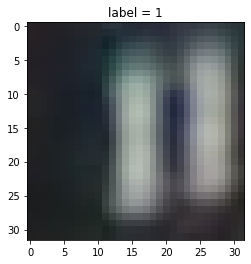

In [0]:
def show(image):
  ig, axes = plt.subplots()
  plt.imshow(image)

for i in range(3,8):
  show(image_test[i])
  plt.title('label = {}'.format(label_test[i]))

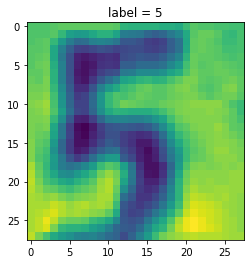

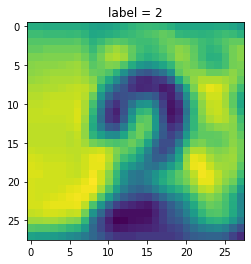

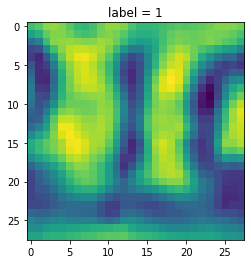

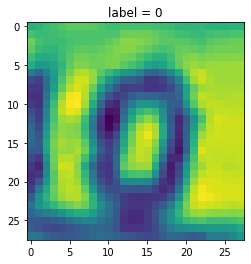

In [0]:
for i in range(0,4):
  show(transform_one_channel(image_test[i]).numpy().squeeze())
  plt.title('label = {}'.format(label_test[i]))

## Transform and prepare for model



In [0]:
transform_one_channel = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

In [0]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),                           
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
                                ])

In [0]:
img_train_transform= torch.stack([transform(x) for x in image_train])
lable_train = torch.from_numpy(label_train)

In [0]:
img_train_transform.shape

torch.Size([73257, 3, 28, 28])

In [0]:
lable_train.shape

torch.Size([73257])

In [0]:
img_test_transform= torch.stack([transform(x) for x in image_test])
label_test = torch.from_numpy(label_test)
print(img_test_transform.shape, label_test.shape)

torch.Size([26032, 3, 28, 28]) torch.Size([26032])


# Load & transform SVHN test and train datasets in batches with DataLoader

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform = transforms.Compose([
                                transforms.CenterCrop((28, 28)),
                                transforms.ToTensor(),
                                #transforms.Normalize([0.5,],[0.5,])
                                transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
print("Batch size = 64")

Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Shape of train inputs:  torch.Size([64, 3, 28, 28]) ; Shape of train labels:  torch.Size([64])
Shape of test inputs:  torch.Size([64, 3, 28, 28]) ; Shape of test inputs:  torch.Size([64])
Batch size = 64


In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
print("Batch size = 64")



Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Shape of train inputs:  torch.Size([64, 1, 28, 28]) ; Shape of train labels:  torch.Size([64])
Shape of test inputs:  torch.Size([64, 1, 28, 28]) ; Shape of test inputs:  torch.Size([64])
Batch size = 64


In [0]:
dataiter = iter(dataloader_test)
images, labels = dataiter.next()
img = images[1]


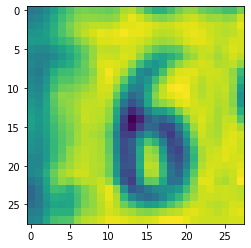

In [0]:
show(img.numpy().squeeze())

# Build the model


In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2352, 512) # 28*28*3
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128) 
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
    def forward(self, x):
        # (batch size, channels, H, W) : (64, 3, 28, 28)
        x = x.view(x.shape[0], -1)     
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim=1)

        return x

## Make cuda available

In [0]:
model = Classifier()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)

In [0]:
torch.cuda.is_available()

True

In [0]:
torch.cuda.current_stream()

<torch.cuda.Stream device=cuda:0 cuda_stream=0x0>

## Optimizer & criterion 


In [0]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Train and test the model 

In [0]:
epochs = 50

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)

      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          img=img.to(device)
          labels=labels.to(device)

          log_ps=model(img)
          loss = criterion(log_ps, labels)

          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))


      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Epoch: 1/50  Training Loss: 0.738  Test Loss: 1.010  Test Accuracy: 0.716
Epoch: 2/50  Training Loss: 0.689  Test Loss: 0.958  Test Accuracy: 0.734
Epoch: 3/50  Training Loss: 0.666  Test Loss: 0.904  Test Accuracy: 0.741
Epoch: 4/50  Training Loss: 0.641  Test Loss: 0.800  Test Accuracy: 0.776
Epoch: 5/50  Training Loss: 0.618  Test Loss: 0.916  Test Accuracy: 0.749
Epoch: 6/50  Training Loss: 0.608  Test Loss: 0.928  Test Accuracy: 0.749
Epoch: 7/50  Training Loss: 0.588  Test Loss: 0.909  Test Accuracy: 0.761
Epoch: 8/50  Training Loss: 0.576  Test Loss: 0.881  Test Accuracy: 0.765
Epoch: 9/50  Training Loss: 0.560  Test Loss: 0.782  Test Accuracy: 0.784
Epoch: 10/50  Training Loss: 0.543  Test Loss: 0.797  Test Accuracy: 0.787
Epoch: 11/50  Training Loss: 0.533  Test Loss: 0.812  Test Accuracy: 0.782
Epoch: 12/50  Training Loss: 0.525  Test Loss: 0.780  Test Accuracy: 0.798
Epoch: 13/50  Training Loss: 0.523  Test Loss: 0.799  Test Accuracy: 0.798
Epoch: 14/50  Training Loss: 0.507

In [0]:
model=Classifier()

In [0]:
model

Classifier(
  (fc1): Linear(in_features=2352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)

# Train with one channel inputs

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
print("Batch size = 64")


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128) 
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)     
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Shape of train inputs:  torch.Size([64, 1, 28, 28]) ; Shape of train labels:  torch.Size([64])
Shape of test inputs:  torch.Size([64, 1, 28, 28]) ; Shape of test inputs:  torch.Size([64])
Batch size = 64


In [0]:
model = Classifier()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)

In [0]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [0]:
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))

      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Epoch: 1/30  Training Loss: 1.181  Test Loss: 0.975  Test Accuracy: 0.704
Epoch: 2/30  Training Loss: 0.827  Test Loss: 0.926  Test Accuracy: 0.719
Epoch: 3/30  Training Loss: 0.731  Test Loss: 0.814  Test Accuracy: 0.762
Epoch: 4/30  Training Loss: 0.677  Test Loss: 0.807  Test Accuracy: 0.760
Epoch: 5/30  Training Loss: 0.636  Test Loss: 0.805  Test Accuracy: 0.762
Epoch: 6/30  Training Loss: 0.613  Test Loss: 0.770  Test Accuracy: 0.771
Epoch: 7/30  Training Loss: 0.581  Test Loss: 0.752  Test Accuracy: 0.783
Epoch: 8/30  Training Loss: 0.568  Test Loss: 0.765  Test Accuracy: 0.783
Epoch: 9/30  Training Loss: 0.550  Test Loss: 0.746  Test Accuracy: 0.786
Epoch: 10/30  Training Loss: 0.532  Test Loss: 0.788  Test Accuracy: 0.781
Epoch: 11/30  Training Loss: 0.522  Test Loss: 0.792  Test Accuracy: 0.776
Epoch: 12/30  Training Loss: 0.509  Test Loss: 0.734  Test Accuracy: 0.800
Epoch: 13/30  Training Loss: 0.496  Test Loss: 0.716  Test Accuracy: 0.800
Epoch: 14/30  Training Loss: 0.489

In [0]:
images, labels = next(iter(dataloader_test))
images=images.to(device)
img = images[7]

ps = torch.exp(model(img))
top_p, top_class = ps.topk(1, dim=1)

In [0]:
top_class

tensor([[3]], device='cuda:0')

In [0]:
top_p

tensor([[0.7465]], device='cuda:0', grad_fn=<TopkBackward>)

In [0]:
ps

tensor([[0.0090, 0.0026, 0.0296, 0.7465, 0.0118, 0.0548, 0.0245, 0.0050, 0.0904,
         0.0258]], device='cuda:0', grad_fn=<ExpBackward>)

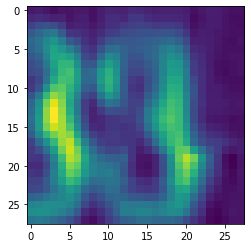

In [0]:
show(img.cpu().numpy().squeeze())

tensor([[0.9997]], device='cuda:0', grad_fn=<TopkBackward>)
tensor([[4]], device='cuda:0')


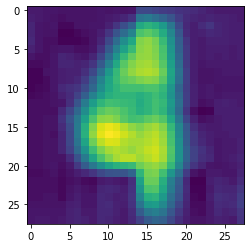

In [0]:
img = images[1]

ps = torch.exp(model(img))
top_p, top_class = ps.topk(1, dim=1)
show(img.cpu().numpy().squeeze())
print(top_p)
print(top_class)

tensor([[0.9985]], device='cuda:0', grad_fn=<TopkBackward>)
tensor([[2]], device='cuda:0')


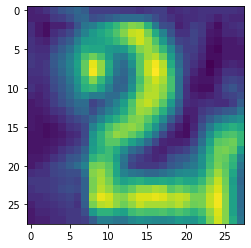

In [0]:
img = images[2]

ps = torch.exp(model(img))
top_p, top_class = ps.topk(1, dim=1)
show(img.cpu().numpy().squeeze())
print(top_p)
print(top_class)

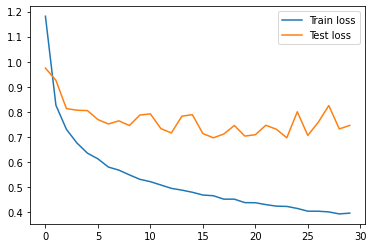

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

best result: Epoch: 24/30  Training Loss: 0.424  Test Loss: 0.697  Test Accuracy: 0.823

# CNN with different transform 
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
number of out_channels = 4

Epoch: 22/30  Training Loss: 0.503  Test Loss: 0.634  Test Accuracy: 0.807

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")



class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,4,2)
        self.conv2=nn.Conv2d(4,8,2)
        self.fc1 = nn.Linear(288, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)




epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/30  Training Loss: 1.511  Test Loss: 1.005  Test Accuracy: 0.682
Epoch: 2/30  Training Loss: 0.845  Test Loss: 0.866  Test Accuracy: 0.731
Epoch: 3/30  Training Loss: 0.736  Test Loss: 0.808  Test Accuracy: 0.750
Epoch: 4/30  Training Loss: 0.690  Test Loss: 0.799  Test Accuracy: 0.750
Epoch: 5/30  Training Loss: 0.663  Test Loss: 0.782  Test Accuracy: 0.756
Epoch: 6/30  Training Loss: 0.636  Test Loss: 0.731  Test Accuracy: 0.773
Epoch: 7/30  Training Loss: 0.616  Test Loss: 0.719  Test Accuracy: 0.780
Epoch: 8/30  Training Loss: 0.602  Test Loss: 0.736  Test Accuracy: 0.775
Epoch: 9/30  Training Loss: 0.585  Test Loss: 0.713  Test Accuracy: 0.777
Epoch: 10/30  Training Loss: 0.571  Test Loss: 0.685  Test Accuracy: 0.791
Epoch: 11/30  Training Loss: 0.563  Test Loss: 0.711  Test Accuracy: 0.778
Epo

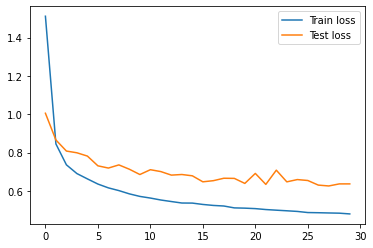

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

# CNN with different filter and output channel
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
number of out_channels (filters) = 8

Epoch: 16/30  Training Loss: 0.400  Test Loss: 0.528  Test Accuracy: 0.849

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")





class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,8,5)
        self.conv2=nn.Conv2d(8,16,5)
        self.fc1 = nn.Linear(256, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)




epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/30  Training Loss: 1.103  Test Loss: 0.773  Test Accuracy: 0.764
Epoch: 2/30  Training Loss: 0.639  Test Loss: 0.667  Test Accuracy: 0.794
Epoch: 3/30  Training Loss: 0.560  Test Loss: 0.662  Test Accuracy: 0.800
Epoch: 4/30  Training Loss: 0.517  Test Loss: 0.638  Test Accuracy: 0.806
Epoch: 5/30  Training Loss: 0.494  Test Loss: 0.602  Test Accuracy: 0.824
Epoch: 6/30  Training Loss: 0.474  Test Loss: 0.600  Test Accuracy: 0.821
Epoch: 7/30  Training Loss: 0.459  Test Loss: 0.562  Test Accuracy: 0.831
Epoch: 8/30  Training Loss: 0.447  Test Loss: 0.592  Test Accuracy: 0.822
Epoch: 9/30  Training Loss: 0.439  Test Loss: 0.534  Test Accuracy: 0.840
Epoch: 10/30  Training Loss: 0.435  Test Loss: 0.587  Test Accuracy: 0.827
Epoch: 11/30  Training Loss: 0.430  Test Loss: 0.532  Test Accuracy: 0.845
Epo

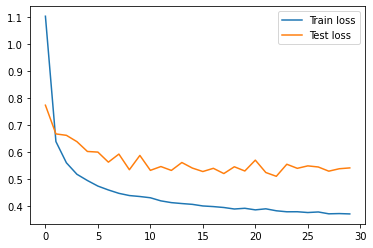

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

# CNN with nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
number of out_channels = 8


In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")





class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,8,4)
        self.conv2=nn.Conv2d(8,16,4)
        self.fc1 = nn.Linear(256, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)




epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/30  Training Loss: 1.377  Test Loss: 0.989  Test Accuracy: 0.688
Epoch: 2/30  Training Loss: 0.778  Test Loss: 0.773  Test Accuracy: 0.761
Epoch: 3/30  Training Loss: 0.639  Test Loss: 0.696  Test Accuracy: 0.783
Epoch: 4/30  Training Loss: 0.577  Test Loss: 0.620  Test Accuracy: 0.810
Epoch: 5/30  Training Loss: 0.542  Test Loss: 0.638  Test Accuracy: 0.802
Epoch: 6/30  Training Loss: 0.514  Test Loss: 0.590  Test Accuracy: 0.818
Epoch: 7/30  Training Loss: 0.496  Test Loss: 0.582  Test Accuracy: 0.823
Epoch: 8/30  Training Loss: 0.482  Test Loss: 0.580  Test Accuracy: 0.824
Epoch: 9/30  Training Loss: 0.466  Test Loss: 0.536  Test Accuracy: 0.838
Epoch: 10/30  Training Loss: 0.456  Test Loss: 0.534  Test Accuracy: 0.839
Epoch: 11/30  Training Loss: 0.448  Test Loss: 0.550  Test Accuracy: 0.831
Epo

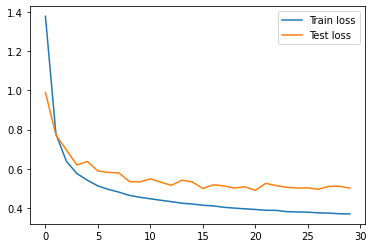

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

best result: Epoch: 21/30  Training Loss: 0.394  Test Loss: 0.491  Test Accuracy: 0.857

# Another test CNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005),
kernel size 4

best result: Epoch: 29/30  Training Loss: 0.493  Test Loss: 0.578  Test Accuracy: 0.832

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")





class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,8,4)
        self.conv2=nn.Conv2d(8,16,4)
        self.fc1 = nn.Linear(256, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)




epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/30  Training Loss: 1.171  Test Loss: 0.855  Test Accuracy: 0.738
Epoch: 2/30  Training Loss: 0.738  Test Loss: 0.751  Test Accuracy: 0.768
Epoch: 3/30  Training Loss: 0.672  Test Loss: 0.777  Test Accuracy: 0.760
Epoch: 4/30  Training Loss: 0.640  Test Loss: 0.678  Test Accuracy: 0.791
Epoch: 5/30  Training Loss: 0.616  Test Loss: 0.662  Test Accuracy: 0.799
Epoch: 6/30  Training Loss: 0.598  Test Loss: 0.740  Test Accuracy: 0.773
Epoch: 7/30  Training Loss: 0.579  Test Loss: 0.668  Test Accuracy: 0.796
Epoch: 8/30  Training Loss: 0.565  Test Loss: 0.631  Test Accuracy: 0.809
Epoch: 9/30  Training Loss: 0.558  Test Loss: 0.687  Test Accuracy: 0.789
Epoch: 10/30  Training Loss: 0.551  Test Loss: 0.672  Test Accuracy: 0.796
Epoch: 11/30  Training Loss: 0.543  Test Loss: 0.668  Test Accuracy: 0.797
Epo

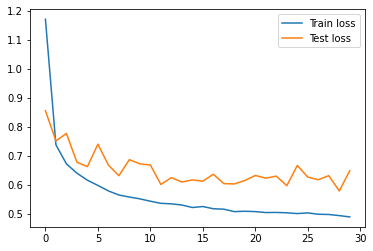

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

# CNN
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
out_channels = 8

best results: Epoch: 20/30 Training Loss: 0.372 Test Loss: 0.491 Test Accuracy: 0.856

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")





class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,8,4)
        self.conv2=nn.Conv2d(8,16,4)
        self.fc1 = nn.Linear(256, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)




epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/30  Training Loss: 1.051  Test Loss: 0.801  Test Accuracy: 0.748
Epoch: 2/30  Training Loss: 0.630  Test Loss: 0.669  Test Accuracy: 0.794
Epoch: 3/30  Training Loss: 0.554  Test Loss: 0.605  Test Accuracy: 0.817
Epoch: 4/30  Training Loss: 0.518  Test Loss: 0.597  Test Accuracy: 0.816
Epoch: 5/30  Training Loss: 0.488  Test Loss: 0.581  Test Accuracy: 0.822
Epoch: 6/30  Training Loss: 0.473  Test Loss: 0.541  Test Accuracy: 0.834
Epoch: 7/30  Training Loss: 0.454  Test Loss: 0.546  Test Accuracy: 0.832
Epoch: 8/30  Training Loss: 0.439  Test Loss: 0.548  Test Accuracy: 0.831
Epoch: 9/30  Training Loss: 0.433  Test Loss: 0.523  Test Accuracy: 0.843
Epoch: 10/30  Training Loss: 0.424  Test Loss: 0.508  Test Accuracy: 0.849
Epoch: 11/30  Training Loss: 0.415  Test Loss: 0.542  Test Accuracy: 0.840
Epo

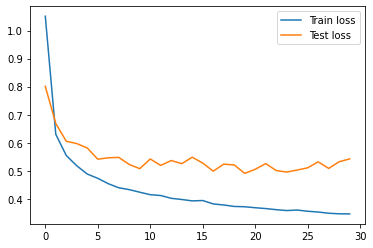

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

Epoch: 20/30  Training Loss: 0.372  Test Loss: 0.491  Test Accuracy: 0.856

# CNN with batch 32,

Epoch: 15/20  Training Loss: 0.426  Test Loss: 0.525  Test Accuracy: 0.846

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")





class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,8,5)
        self.conv2=nn.Conv2d(8,16,5)
        self.fc1 = nn.Linear(256, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)




epochs = 20
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/20  Training Loss: 1.092  Test Loss: 0.859  Test Accuracy: 0.729
Epoch: 2/20  Training Loss: 0.685  Test Loss: 0.709  Test Accuracy: 0.786
Epoch: 3/20  Training Loss: 0.590  Test Loss: 0.655  Test Accuracy: 0.802
Epoch: 4/20  Training Loss: 0.545  Test Loss: 0.645  Test Accuracy: 0.803
Epoch: 5/20  Training Loss: 0.517  Test Loss: 0.621  Test Accuracy: 0.811
Epoch: 6/20  Training Loss: 0.496  Test Loss: 0.585  Test Accuracy: 0.824
Epoch: 7/20  Training Loss: 0.483  Test Loss: 0.551  Test Accuracy: 0.836
Epoch: 8/20  Training Loss: 0.469  Test Loss: 0.579  Test Accuracy: 0.827
Epoch: 9/20  Training Loss: 0.462  Test Loss: 0.553  Test Accuracy: 0.836
Epoch: 10/20  Training Loss: 0.452  Test Loss: 0.567  Test Accuracy: 0.831
Epoch: 11/20  Training Loss: 0.444  Test Loss: 0.595  Test Accuracy: 0.824
Epo

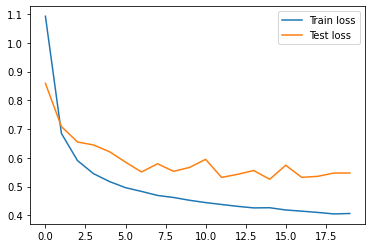

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

# CNN with batch 64

Epoch: 16/20  Training Loss: 0.362  Test Loss: 0.499  Test Accuracy: 0.856

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")





class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,8,5)
        self.conv2=nn.Conv2d(8,16,5)
        self.fc1 = nn.Linear(256, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)




epochs = 20
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/20  Training Loss: 0.974  Test Loss: 0.737  Test Accuracy: 0.780
Epoch: 2/20  Training Loss: 0.594  Test Loss: 0.659  Test Accuracy: 0.803
Epoch: 3/20  Training Loss: 0.523  Test Loss: 0.594  Test Accuracy: 0.821
Epoch: 4/20  Training Loss: 0.482  Test Loss: 0.536  Test Accuracy: 0.837
Epoch: 5/20  Training Loss: 0.456  Test Loss: 0.543  Test Accuracy: 0.837
Epoch: 6/20  Training Loss: 0.436  Test Loss: 0.533  Test Accuracy: 0.842
Epoch: 7/20  Training Loss: 0.425  Test Loss: 0.524  Test Accuracy: 0.840
Epoch: 8/20  Training Loss: 0.412  Test Loss: 0.510  Test Accuracy: 0.846
Epoch: 9/20  Training Loss: 0.402  Test Loss: 0.500  Test Accuracy: 0.854
Epoch: 10/20  Training Loss: 0.393  Test Loss: 0.506  Test Accuracy: 0.851
Epoch: 11/20  Training Loss: 0.387  Test Loss: 0.511  Test Accuracy: 0.848
Epo

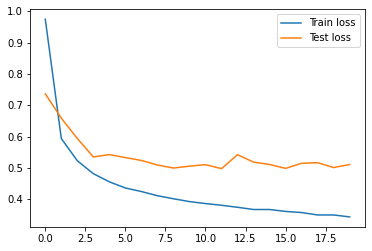

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()

# CNN test 2
filter 5

Epoch: 21/30  Training Loss: 0.445  Test Loss: 0.577  Test Accuracy: 0.825

In [0]:

root='http://ufldl.stanford.edu/housenumbers/'

transform_one_channel = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1), 
                                transforms.RandomHorizontalFlip(),                             
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])


transform_one_channel_test = transforms.Compose([
                               # transforms.ToPILImage(),
                                transforms.CenterCrop((28, 28)),
                                transforms.Grayscale(num_output_channels=1),                              
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,],[0.5,])
                                ])

train = torchvision.datasets.SVHN(root, split='train', transform=transform_one_channel, target_transform=None, download=True)

dataloader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.SVHN(root, split='test', transform=transform_one_channel_test, target_transform=None, download=True)

dataloader_test = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

images_train, labels_train = next(iter(dataloader_train))
images_test, labels_test = next(iter(dataloader_test))

#print("Shape of train inputs: ", images_train.shape, "; Shape of train labels: ", labels_train.shape)
#print("Shape of test inputs: ",images_test.shape, "; Shape of test inputs: ", labels_test.shape)
#print("Batch size = 64")



class ClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,5,2)
        self.conv2=nn.Conv2d(5,16,2)
        self.fc1 = nn.Linear(576, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.shape[0], -1)   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)

        return x



model = ClassifierCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)




epochs = 30
all_train_loss=[]
all_test_loss=[]

for e in range(epochs):
    train_loss = 0
    test_loss = 0
    accuracy = 0

    for images, labels in dataloader_train:

      images=images.to(device)
      labels=labels.to(device)
      log_ps = model(images)
      loss = criterion(log_ps, labels)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()

    else:
      with torch.no_grad():
        for img, labels in dataloader_test:
          model.eval()
          img=img.to(device)
          labels=labels.to(device)
          log_ps=model(img)
          loss = criterion(log_ps, labels)
          test_loss+= loss.item()
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)


          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      model.train()
      all_train_loss.append(train_loss/len(dataloader_train))
      all_test_loss.append(test_loss/len(dataloader_test))

 
      print("Epoch: {}/{} ".format(e+1, epochs),
            "Training Loss: {:.3f} ".format(train_loss/len(dataloader_train)),
            "Test Loss: {:.3f} ".format(test_loss/len(dataloader_test)),
            "Test Accuracy: {:.3f}".format(accuracy/len(dataloader_test)))




Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Using downloaded and verified file: http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Epoch: 1/30  Training Loss: 1.374  Test Loss: 0.991  Test Accuracy: 0.683
Epoch: 2/30  Training Loss: 0.842  Test Loss: 0.867  Test Accuracy: 0.724
Epoch: 3/30  Training Loss: 0.741  Test Loss: 0.800  Test Accuracy: 0.744
Epoch: 4/30  Training Loss: 0.681  Test Loss: 0.755  Test Accuracy: 0.760
Epoch: 5/30  Training Loss: 0.647  Test Loss: 0.735  Test Accuracy: 0.766
Epoch: 6/30  Training Loss: 0.616  Test Loss: 0.718  Test Accuracy: 0.773
Epoch: 7/30  Training Loss: 0.591  Test Loss: 0.732  Test Accuracy: 0.772
Epoch: 8/30  Training Loss: 0.570  Test Loss: 0.706  Test Accuracy: 0.777
Epoch: 9/30  Training Loss: 0.551  Test Loss: 0.687  Test Accuracy: 0.785
Epoch: 10/30  Training Loss: 0.538  Test Loss: 0.685  Test Accuracy: 0.786
Epoch: 11/30  Training Loss: 0.521  Test Loss: 0.634  Test Accuracy: 0.803
Epo

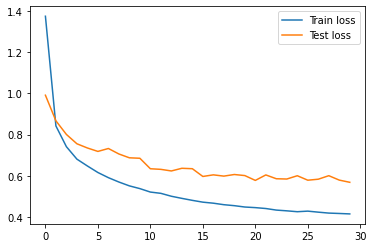

In [0]:
plt.plot(all_train_loss, label="Train loss")
plt.plot(all_test_loss, label="Test loss")
plt.legend()